In [11]:
import pymysql
import matplotlib.pyplot as plt
import pandas as pd
import ipyleaflet
import ipywidgets
import bqplot.pyplot as blt

In [13]:
#connection = pymysql.connect(host="localhost", password="seCT689hgwnp8dne", user="ghtorrentuser", db="ghtorrent_restore")

In [8]:
c = connection.cursor()

In [12]:
c.execute("select * from `ghtorrent_restore`.`projects` limit 0")
#print(c.description)
des_projects = c.description
for i in des_projects:
    print(i[0])

id
url
owner_id
name
description
language
created_at
forked_from
deleted
updated_at


In [13]:
c.execute("select * from `ghtorrent_restore`.`users` limit 0")
#print(c.description)
des_users = c.description
for i in des_users:
    print(i[0])

id
login
company
created_at
type
fake
deleted
long
lat
country_code
state
city
location


In [14]:
c.execute("select * from `ghtorrent_restore`.`repo_labels` limit 0")
#print(c.description)
des_repos = c.description
for i in des_repos:
    print(i[0])

id
repo_id
name


In [15]:
c.execute("select * from `ghtorrent_restore`.`commits` limit 0")
#print(c.description)
des_commits = c.description
for i in des_commits:
    print(i[0])

id
sha
author_id
committer_id
project_id
created_at


In [16]:
c.execute("select * from `ghtorrent_restore`.`organization_members` limit 0")
#print(c.description)
des_orgs = c.description
for i in des_orgs:
    print(i[0])

org_id
user_id
created_at


In [17]:
c.execute("select * from `ghtorrent_restore`.`project_members` limit 0")
#print(c.description)
des_projmembers = c.description
for i in des_projmembers:
    print(i[0])

repo_id
user_id
created_at
ext_ref_id


In [18]:
c.execute("select * from `ghtorrent_restore`.`repo_milestones` limit 0")
#print(c.description)
des_milestones = c.description
for i in des_milestones:
    print(i[0])

id
repo_id
name


In [19]:
c.execute("select * from `ghtorrent_restore`.`project_commits` limit 0")
#print(c.description)
des_projcommits = c.description
for i in des_projcommits:
    print(i[0])

project_id
commit_id


In [20]:
c.execute("select * from `ghtorrent_restore`.`pull_request_history` limit 0")
#print(c.description)
des_pullhistory = c.description
for i in des_pullhistory:
    print(i[0])

id
pull_request_id
created_at
action
actor_id


In [22]:
projects = "select `id`,`name`,`created_at`,`deleted`, `forked_from`, `updated_at` from `ghtorrent_restore`.`projects` limit 80000"
c.execute(projects)
#c.fetchall()
names_dates_list =[]
for p in c.fetchall():
    deleted = p[3]
    #print(deleted)
    plus = []
    date = str(p[2])
    date_only = date.split(" ")
    year_only = date_only[0].split("-")
    #print(year_only[0])
    #print(p[1], date_only[0])
    plus.append(p[1])
    plus.append(date_only[0])
    plus.append(year_only[0])
    plus.append(deleted)
    names_dates_list.append(plus)
#print(names_dates_list)
dfObj = pd.DataFrame(names_dates_list, columns = ["project_name", "created_at", "year", "deleted"]) 

In [23]:
dfObj.head()

,project_name,created_at,year,deleted
0,noproject,2016-04-18,2016,0
1,ruote-kit,2009-12-08,2009,0
2,ruote-kit,2009-06-10,2009,0
3,basemap,2011-02-19,2011,0
4,basemap,2012-06-14,2012,1


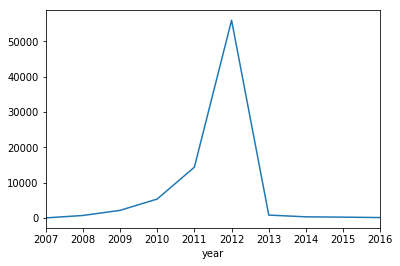

In [24]:
count_dates = dfObj.groupby('year')['project_name'].count().plot()

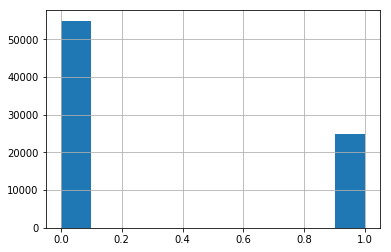

In [25]:
dfObj['deleted'].hist()

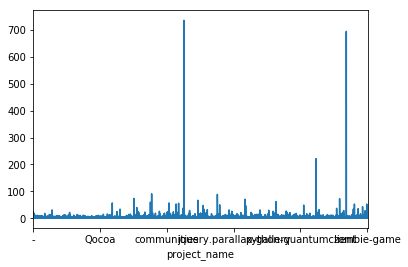

In [26]:
project_count = dfObj.groupby("project_name")["project_name"].count().plot()

In [27]:
pcount = {}
for i in dfObj["project_name"]:
    if i in pcount:
        pcount[i] += 1
    else:
        pcount[i] = 1
        
#print(codes)

list(pcount.values())
list(pcount.items())

pcount_df = pd.DataFrame(list(pcount.items()), 
                        columns = ["project", "count"])

pcount_sort = pcount_df.sort_values(by = "count", ascending = False)[1:16]

pcount_sort

,project,count
66,try_git,695
51,sample_app,222
425,bootstrap,91
609,homebrew,89
26,android,74
353,test,73
462,liferay-portal,71
2641,first_app,67
1313,dotvim,67
1790,oh-my-zsh,62


Text(0.5, 1.0, 'Most Used Project Names')

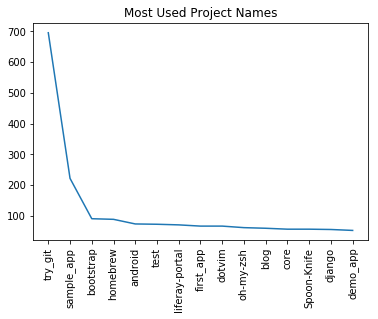

In [32]:
plt.plot(pcount_sort["project"],pcount_sort["count"])
plt.xticks(rotation='vertical')
plt.title("Most Used Project Names")

id
login
company
created_at
type
fake
deleted
long
lat
country_code
state
city
location

In [10]:
users_table = ("select `login`, `created_at`, `deleted`, `type`, `long`, `lat`, `city`, `location`, `country_code` from `ghtorrent_restore`.`users` limit 80000")
c.execute(users_table)
users_list = c.fetchall()

dates_list =[]
for p in users_list:
    deleted = p[2]
    ptype = p[3]
    long = p[4]
    lat = p[5]
    city = p[6]
    location = str(p[7])
    country_code = p[8]
    country = location.split(",")
    #print(country)
    plus = []
    date = str(p[1])
    #print(date)
    date_only = date.split(" ")
    year_only = date_only[0].split("-")
    #print(year_only[0])
    #print(p[1], date_only[0])
    plus.append(p[0])
    plus.append(date_only[0])
    plus.append(year_only[0])
    plus.append(deleted)
    plus.append(ptype)
    plus.append(long)
    plus.append(lat)
    plus.append(city)
    plus.append(location)
    plus.append(country_code)
    dates_list.append(plus)
#print(dates_list)

In [11]:
users_df = pd.DataFrame(dates_list, 
                        columns = ["login", "created_at", "created_year", 
                                   "deleted", "type", "long", "lat", "city", "location", "country_code"])


print()
print(users_df.head())
print()
print(users_df.isna().sum())
print()
print("Number of deleted users:", users_df["deleted"].sum())
print()
print("Range of Years:", users_df["created_year"].unique())
print()
print(users_df["country_code"].unique())
print()


           login  created_at created_year  deleted type          long  \
0        0xnoone  2016-04-18         2016        1  USR          None   
1          tosch  2008-12-15         2008        0  USR          0E-8   
2      jmettraux  2008-03-22         2008        0  USR  132.45529270   
3       SMGNMSKD  2012-08-03         2012        1  USR          None   
4  kennethkalmer  2008-04-28         2008        0  USR   28.04730510   

            lat          city                    location country_code  
0          None          None                        None         None  
1          0E-8          None            Rastede, Germany         None  
2   34.38520290     Hiroshima                   Hiroshima           jp  
3          None          None                        None         None  
4  -26.20410280  Johannesburg  Johannesburg, South Africa           za  

login               0
created_at          0
created_year        0
deleted             0
type                0
long       

In [12]:
codes = {}
for i in users_df["country_code"]:
    if i in codes:
        codes[i] += 1
    else:
        codes[i] = 1
        
#print(codes)

list(codes.values())
list(codes.items())

codes_df = pd.DataFrame(list(codes.items()), 
                        columns = ["codes", "count"])

codes_sort = codes_df.sort_values(by = "count", ascending = False)[1:11]

codes_sort

,codes,count
8,us,16039
6,gb,2612
4,de,2493
11,cn,1644
13,ca,1619
12,fr,1363
1,jp,1088
19,br,1051
9,au,1011
14,ru,801


Text(0.5, 1.0, 'Countries with the most users')

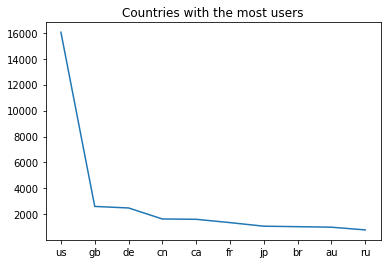

In [13]:
plt.plot(codes_sort["codes"],codes_sort["count"])
#plt.xticks(rotation='vertical')
plt.title("Countries with the most users")

In [14]:
stats = {}
for i in users_df["city"]:
    if i in stats:
        stats[i] += 1
    else:
        stats[i] = 1
        

list(stats.values())
list(stats.items())

city_df = pd.DataFrame(list(stats.items()), 
                        columns = ["city", "count"])

city_sort = city_df.sort_values(by = "count", ascending = False)[1:16]

Text(0.5, 1.0, 'Cities with the most users')

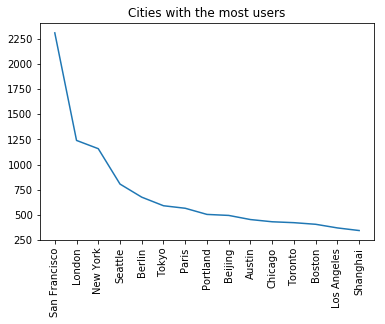

In [15]:
plt.plot(city_sort["city"],city_sort["count"])
plt.xticks(rotation='vertical')
plt.title("Cities with the most users")

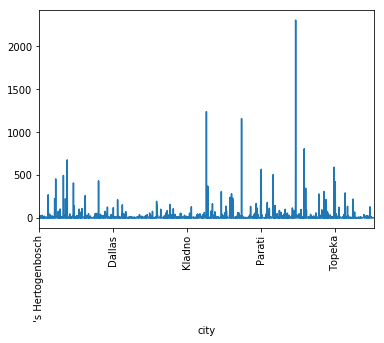

In [18]:
users_df.groupby("city")["city"].count().plot(rot = "vertical")

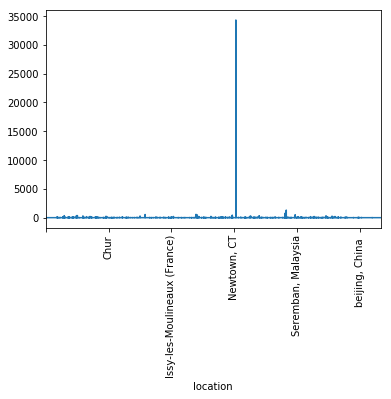

In [19]:
users_df.groupby("location")["location"].count().plot(rot = "vertical")

In [16]:
latlong = users_df.iloc[:,5:7]
cols = ["long","lat"]

for col in cols:
    latlong[col] = pd.to_numeric(latlong[col])
    
latlong.head()
latlong.notna()
latlong_n = latlong.dropna()
#print(latlong_n["long"], latlong_n["lat"])
l = latlong_n.reset_index()
t = l["long"][3], l["lat"][3]
print(t)
l.head()

(12.4963655, 41.9027835)


,index,long,lat
0,1,0.000000,0.000000
1,2,132.455293,34.385203
2,4,28.047305,-26.204103
3,5,12.496365,41.902783
4,6,0.000000,0.000000


In [17]:
m = ipyleaflet.Map(center=(50, 0), zoom = 2)

#markers = ipyleaflet.Marker()
for i in range(100):
    #print(i)
    if l["long"][i] == 0.000000:
        pass
    else:
        marker = ipyleaflet.Marker(location = (l["long"][i],l["lat"][i]))
        #print(marker)
        m.add_layer(marker)
m

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

In [96]:
mt = ipyleaflet.Map(center=(50, 0), zoom = 2)

marker = ipyleaflet.Marker(location = (12.4963655, 41.9027835))
print(marker)
mt.add_layer(marker)
mt

Marker(location=[12.4963655, 41.9027835], options=['alt', 'draggable', 'keyboard', 'rise_offset', 'rise_on_hover', 'rotation_angle', 'rotation_origin', 'title', 'z_index_offset'])


Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

In [82]:
long_list = []
for i in users_df["long"]:
    long_list.append(i)
    
lat_list = []
for i in users_df["lat"]:
    if i == None:
        pass
    if i == '0E-8':
        pass
    lat_list.append(i)
    
print(lat_list)

[None, Decimal('0E-8'), Decimal('34.38520290'), None, Decimal('-26.20410280'), Decimal('41.90278350'), Decimal('0E-8'), Decimal('35.68948750'), Decimal('52.52000660'), Decimal('-41.28646030'), Decimal('0E-8'), Decimal('0E-8'), Decimal('55.37805100'), Decimal('36.72127370'), Decimal('41.87811360'), Decimal('51.50642014'), Decimal('-27.46846008'), Decimal('0E-8'), Decimal('39.76840300'), Decimal('33.74899540'), Decimal('0E-8'), Decimal('0E-8'), Decimal('47.51303101'), Decimal('0E-8'), Decimal('0E-8'), None, Decimal('0E-8'), Decimal('39.10311820'), Decimal('37.77927680'), Decimal('0E-8'), Decimal('24.47983300'), Decimal('0E-8'), Decimal('0E-8'), Decimal('35.86166000'), None, Decimal('0E-8'), Decimal('35.78974915'), Decimal('46.22763800'), Decimal('0E-8'), Decimal('0E-8'), Decimal('49.28272910'), Decimal('0E-8'), Decimal('55.75696945'), Decimal('24.47983300'), None, Decimal('0E-8'), Decimal('0E-8'), Decimal('22.39642800'), Decimal('0E-8'), Decimal('0E-8'), Decimal('0E-8'), Decimal('40.4636

In [88]:
user_map = ipyleaflet.Map(center=(50, 0))

#marker1 = ipyleaflet.Marker(location=(float(users_df["long"][2]), float(users_df["lat"][2])))

for i in range(1000):
    marker[i] = ipyleaflet.Marker(locaiton = (float(users_df["long"][i]), float(users_df["lat"][i])))

user_map

TypeError: float() argument must be a string or a number, not 'NoneType'

In [139]:
t = "select `id`,`name` from `ghtorrent_restore`.`projects` join `id` on `id`.`projects` = `id`.`users`"
c.execute(t)
c.fetchone()

ProgrammingError: (1064, "You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near '.`projects` on `id`.`projects` = `id`.`users`' at line 1")

id
pull_request_id
created_at
action
actor_id

In [42]:
pr_history_table = "select * from `ghtorrent_restore`.`pull_request_history` limit 80000"
c.execute(pr_history_table)
pr_history = c.fetchall()

pr_df = pd.DataFrame(list(pr_history), columns = ["id", "pull_request_id", "created_at", "action", "actor_id"])

In [9]:
pr_df.groupby("action")["id"].count()

action
closed    28005
merged    21066
opened    30929
Name: id, dtype: int64

In [10]:
pr_df.groupby("action")["actor_id"].count()

action
closed    24278
merged    20022
opened    30929
Name: actor_id, dtype: int64

In [39]:
pr_df.groupby("action")["id"].count().plot.bar()

NameError: name 'pr_df' is not defined

In [ ]:
plt.bar(pr_df["action"],pr_df["id"].count())

<BarContainer object of 80000 artists>

ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.
